In [1]:
# Image morphology
from skimage import io 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
image = io.imread('bubbles.tif') # boolean image
#io.imshow(image)
image.astype(int)
image = 255*image
#image

In [15]:
image = io.imread('squares.tif')

In [16]:
#image = io.imread('bubbles.tif')
#convert to binary
sh=image.shape
for r in range(0,sh[0]):
    for c in range(0,sh[1]):
        if image[r][c]>150:
            image[r][c]=255
        else:
            image[r][c]=0

In [17]:
im_erosion = image.copy()
# Use structuring element of size 5
sz = 5
se = 255*(np.ones([sz,sz]))
cent = int((sz-1)/2)

In [18]:
#Erosion
sh = image.shape
row = sh[0]
col = sh[1]

for r in range(cent,row-cent):
    for c in range(cent,col-cent):
        temp = image[r-cent:r+cent+1,c-cent:c+cent+1]
        if np.array_equal(temp,se):
            im_erosion[r][c]=255
        else:
            im_erosion[r][c]=0

In [19]:
# Dilation

im_dilation=im_erosion.copy()
for r in range(cent,row-cent):
    for c in range(cent,col-cent):
        temp = im_erosion[r-cent:r+cent+1,c-cent:c+cent+1]
        if np.isin(255,temp):
            im_dilation[r][c]=255
        else:
            im_dilation[r][c]=0

Text(0.5, 1.0, 'Dilated Image')

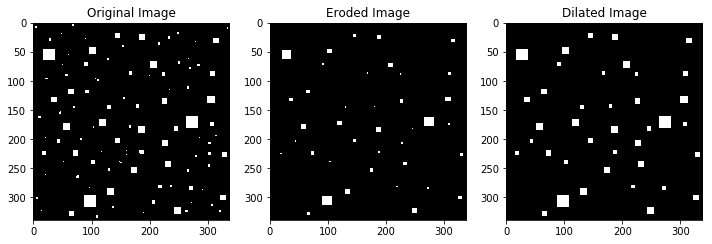

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
io.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
io.imshow(im_erosion,cmap='gray')
plt.title('Eroded Image')

plt.subplot(1,3,3)
io.imshow(im_dilation,cmap='gray')
plt.title('Dilated Image')

Conclusion:-

Before applying morpholgy operation, image should be converted to gray or binary image.

Erosion causes objects to reduce in size by half the size of structuring element, in both rows and columns.

If eroded image is dilated than the eroded objects regain their size.

In an image if a particular object is to be removed then size of structuring element should be larger then that object.

In the given image 'square.tif' size of the structuring element was chosen to select larger squares.

To apply morphology operation using binary structuring element image is first converted to binary before applying momrphology operations.